In [10]:
import sys
import os
import pandas as pd

# Get the absolute path to the 'scripts' directory
scripts_dir = os.path.abspath('../scripts')
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

# Import the custom module
import load_data 
import descriptive_analysis 
import text_analysis
import publisher_analysis
import time_series_analysis




# Load Data

In [11]:
file_path = '../data/raw_analyst_ratings.csv'  # Replace with the path to your dataset
df = load_data.loaddata(file_path)

# Display the first few rows
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [12]:
df = df.drop(columns=['Unnamed: 0'])

# Descriptive Analysis

### Headline Length Analysis

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


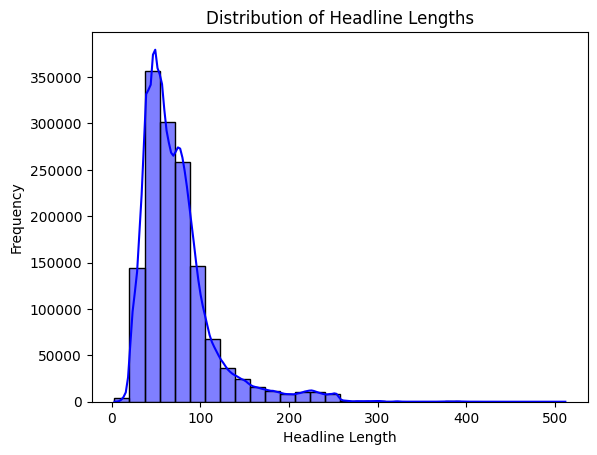

In [13]:
descriptive_analysis.analyze_headline_length(df)

### Summary of Headline Length Distribution

- On average, each headline in the dataset has about **73 characters**.
- A standard deviation of **40.74** means that most of the headlines' lengths are within 40 characters above or below the average, indicating significant variation in headline lengths.
- The shortest headline length in the dataset is **3 characters**.
- **25%** of the headlines have a length of **47 characters or fewer**. This means that a quarter of the headlines are relatively short, with lengths below or equal to 47 characters.
- The **median** headline length is **64 characters**, meaning that half of the headlines have fewer than 64 characters, and half have more. The median is a better indicator of central tendency when the data is skewed.
- **75%** of the headlines have a length of **87 characters or fewer**, suggesting that most headlines fall within this range, with only a smaller proportion being significantly longer.
- The longest headline in the dataset has a length of **512 characters**, indicating that there are some extremely long headlines compared to the majority.


### Articles per Publisher

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


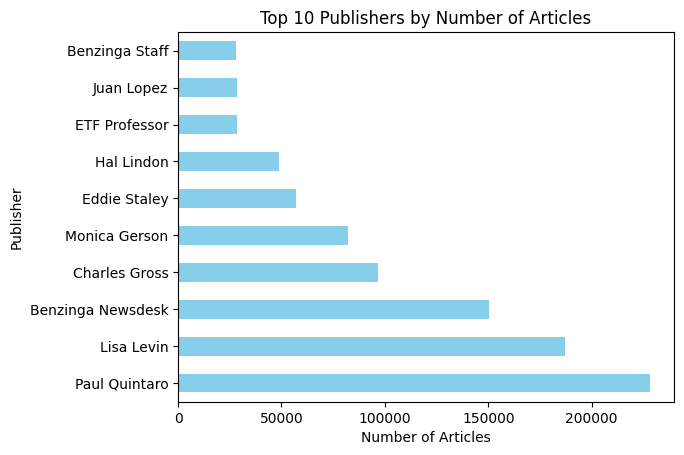

In [14]:
descriptive_analysis.articles_per_publisher(df)

### Analysis of Articles Per Publisher

The following analysis provides insights into the distribution of articles published by each publisher:

- **Paul Quintaro** is the most prolific publisher, with a total of **228,373 articles**. This is significantly higher than the other publishers, suggesting that Paul Quintaro is the dominant contributor in terms of article quantity.
  
- **Lisa Levin** follows with **186,979 articles**, still a large number but notably fewer than Paul Quintaro. It indicates that Lisa Levin is also a major contributor but with a lower publishing frequency compared to Paul Quintaro.

- **Benzinga Newsdesk** published **150,484 articles**, making it the third-highest contributor. Its publication count is still substantial but around 35% lower than that of Paul Quintaro.

- The next few publishers have decreasing article counts, with **Charles Gross** publishing **96,732 articles**, **Monica Gerson** with **82,380 articles**, and **Eddie Staley** publishing **57,254 articles**. These numbers show a clear drop in publishing activity as you move down the list.

- **Hal Lindon** has published **49,047 articles**, and **ETF Professor** comes in with **28,489 articles**. The number of articles drops even further for these publishers, indicating that their publishing frequency is significantly lower compared to the top contributors.

- **Juan Lopez** and **Benzinga Staff** round out the list with **28,438** and **28,114 articles**, respectively. Their article counts are nearly identical, indicating similar publishing activity.

### Key Insights:
- There is a significant disparity in the number of articles published by different authors. A few publishers (e.g., Paul Quintaro, Lisa Levin) dominate the output, while the majority publish much fewer articles.
- The distribution shows a **long tail**, with a small number of publishers producing most of the articles and many others contributing only a few articles.
- Understanding this distribution could help in identifying which publishers are most active and might provide insights into the nature of content creation in the dataset.



### Analyze publication trends over days of the week



In [15]:
descriptive_analysis.process_dates(df)

,headline,url,publisher,date,stock,headline_length,date_conv,hour,day,month
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05 14:30:54+00:00,14,Friday,June
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03 14:45:20+00:00,14,Wednesday,June
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26 08:30:07+00:00,8,Tuesday,May
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22 16:45:06+00:00,16,Friday,May
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22 15:38:59+00:00,15,Friday,May
...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38,2011-08-29 00:00:00+00:00,0,Monday,August
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52,2011-06-22 00:00:00+00:00,0,Wednesday,June
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56,2011-06-21 00:00:00+00:00,0,Tuesday,June
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54,2011-06-21 00:00:00+00:00,0,Tuesday,June


Articles per day of the week:
 day
Monday       265139
Tuesday      296505
Wednesday    300922
Thursday     302619
Friday       217918
Saturday       7759
Sunday        16466
Name: count, dtype: int64
Articles per month:
 month
January      121545
February     122836
March        121949
April        121813
May          130340
June         106598
July         110764
August       124041
September     96089
October      124800
November     121430
December     105123
Name: count, dtype: int64
Articles per hour (normalized):
 hour
0     0.960311
1     0.000058
2     0.000034
3     0.000019
4     0.000048
5     0.000010
6     0.000041
7     0.000066
8     0.001044
9     0.001300
10    0.001759
11    0.003576
12    0.003927
13    0.004239
14    0.005449
15    0.004051
16    0.004073
17    0.001926
18    0.001474
19    0.001145
20    0.002799
21    0.001990
22    0.000500
23    0.000161
Name: proportion, dtype: float64


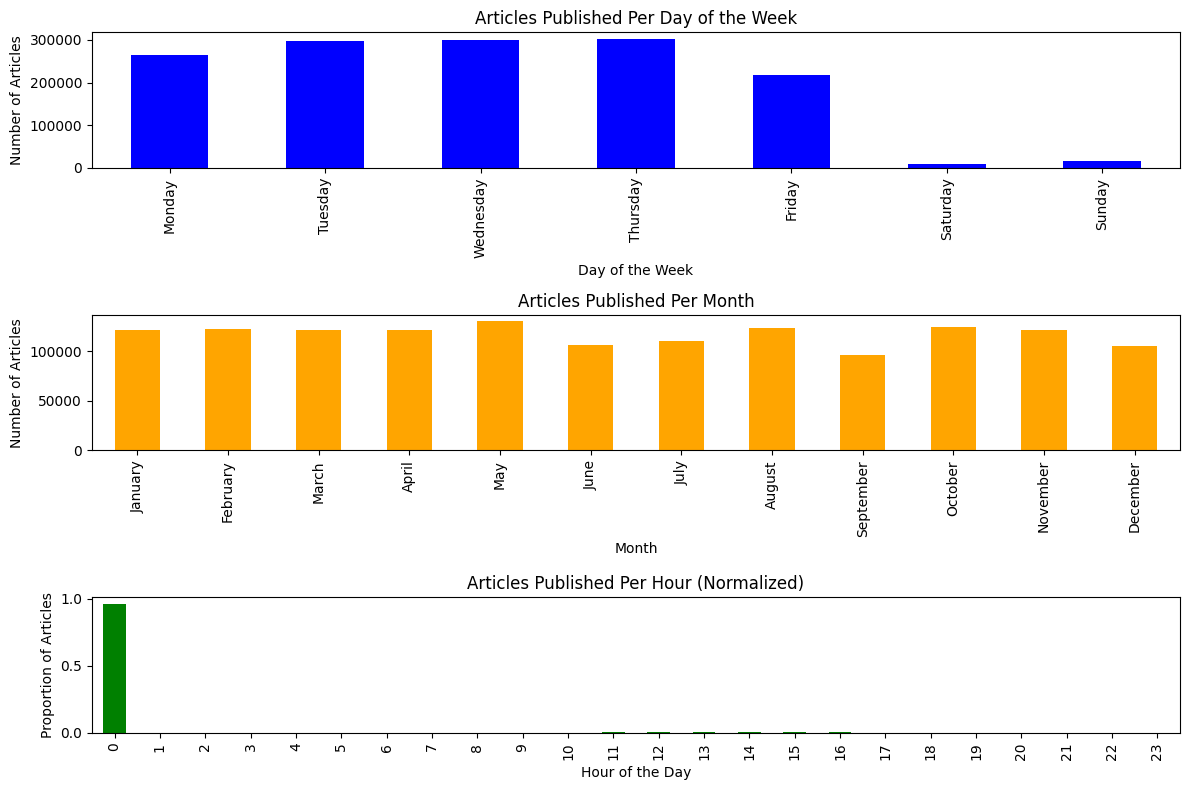

In [20]:
import matplotlib.pyplot as plt

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    # Convert the 'month' and 'day' columns to categorical types with a specific order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
    
    # Analyze articles published per day of the week
articles_per_day = df['day'].value_counts().sort_index()
print("Articles per day of the week:\n", articles_per_day)

    # Analyze articles published per month
articles_per_month = df['month'].value_counts().sort_index()
print("Articles per month:\n", articles_per_month)

    # Analyze articles published by hour
articles_per_hour = df['hour'].value_counts(normalize=True).sort_index()
print("Articles per hour (normalized):\n", articles_per_hour)

    # Plotting results

    
plt.figure(figsize=(12, 8))

    # Plot articles per day
plt.subplot(3, 1, 1)
articles_per_day.plot(kind='bar', color='blue', title='Articles Published Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')

    # Plot articles per month
plt.subplot(3, 1, 2)
articles_per_month.plot(kind='bar', color='orange', title='Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

# Plot articles per hour
plt.subplot(3, 1, 3)
articles_per_hour.plot(kind='bar', color='green', title='Articles Published Per Hour (Normalized)')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Articles')

plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()


Summary of Article Publication Trends
1. Articles Published per Day of the Week
The majority of articles are published on weekdays, with Thursday and Wednesday leading the pack, followed closely by Tuesday.
Friday sees the least number of articles being published, followed by the weekend (Saturday and Sunday) which account for significantly fewer articles.
2. Articles Published per Month
Article publication is relatively consistent across the months, with a slight increase in May and a decrease in June, September, and December.
September stands out as the month with the least number of articles being published.
3. Articles Published per Hour
A notable trend is that the majority of articles are published at midnight, making it the peak hour for article publication.

## Text Analysis
### Sentiment Analysis

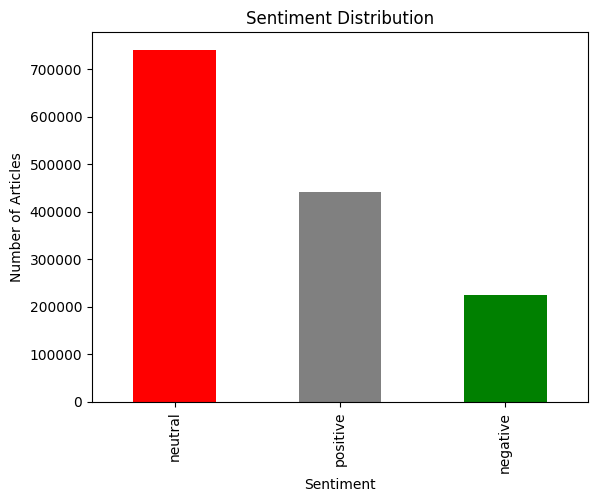

In [22]:
# Perform sentiment analysis on headlines
text_analysis.perform_sentiment_analysis(df)

AS we can see from the graph the majority of the news sentiment  is neutral niether negative or postive followed by positive and then around 26% of the news sentiment is negative which is still a lot

### Generate Word Cloud



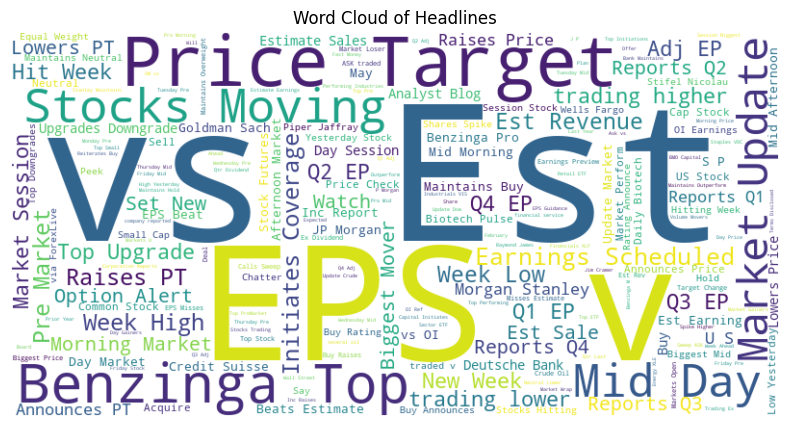

In [23]:
# Generate a word cloud for headlines
text_analysis.generate_wordcloud(df)


 Certainly! Here’s a more detailed and descriptive analysis of the word cloud output:

---

### Word Cloud Analysis: 

From the word cloud visualization, we observe that certain words such as **"VS"**, **"EST"**, and **"EPS"** are notably larger and bolder compared to others. This indicates that these terms are frequently used within the headlines of the dataset, and their prominence suggests they are key topics or concepts.

#### Key Observations:

1. **"VS"** (Versus):  
   - The word **"VS"** appearing prominently suggests that many headlines focus on comparisons, likely between companies, stock performance, or economic indicators. For example, "Company A VS Company B" or "Stock VS Market Trends" might be common types of articles in your dataset.
   - This could indicate a trend in reporting on competitive dynamics, performance evaluations, or direct contrasts within the financial or business world.

2. **"EST"** (Estimated):  
   - The frequent appearance of **"EST"** suggests that many headlines are related to **estimates**, particularly in financial contexts. Common phrases could be like "Q4 EST earnings" or "Revenue EST above expectations."
   - This highlights a focus on **predictions**, **financial forecasting**, or **analytical estimates**, which are central to discussions around business performance, earnings reports, and market expectations.

3. **"EPS"** (Earnings Per Share):  
   - The term **"EPS"** is a critical financial metric, and its prominence in the word cloud indicates a strong focus on **earnings reports** or **financial performance analysis**. Headlines may often refer to **EPS growth**, **EPS decline**, or comparisons of **EPS estimates** across companies or quarters.
   - This is commonly found in articles covering **quarterly financial results**, **investor earnings reports**, and **market analyses** that use EPS as a key indicator of company profitability.

#### Summary Insights:

The presence of these larger words suggests that the headlines in the dataset are heavily focused on **financial performance analysis**, especially related to earnings, market comparisons, and estimates. The repeated references to "VS" highlight a trend toward discussing competition or comparisons between entities, while "EST" and "EPS" indicate that the reporting is centered around financial estimates, predictions, and performance metrics.

These findings could be valuable for understanding the key themes or focal points of the articles in the dataset, particularly within the financial or business news sector. The use of these terms reflects a high concentration of content focused on **company performance**, **market analysis**, and **economic predictions**.

---

This breakdown is intended to give a clearer picture of the thematic focus of the dataset based on the most frequent terms. If you’d like to dive deeper into any specific terms or topics, feel free to ask!


In [24]:
text_analysis.extract_keywords(df)

Top 20 Keywords: ['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']




### Top 20 Keywords Summary:

The top 20 keywords from the dataset highlight the financial focus of the articles, which primarily cover topics like **stock market trends**, **earnings reports**, and **investment recommendations**. Keywords such as **"buy"**, **"downgrades"**, **"raises"**, and **"EPS"** suggest a strong emphasis on **investment decisions** and **company performance**. Terms like **"market"**, **"sales"**, and **"stocks"** reflect ongoing discussions about **market analysis**, **stock performance**, and **financial forecasting**. Overall, the dataset is centered around **financial news**, **market conditions**, and **investment strategies**.

--- 

### Analyze Publication Frequency

In [32]:
df.index = pd.to_datetime(df.index, errors='coerce')


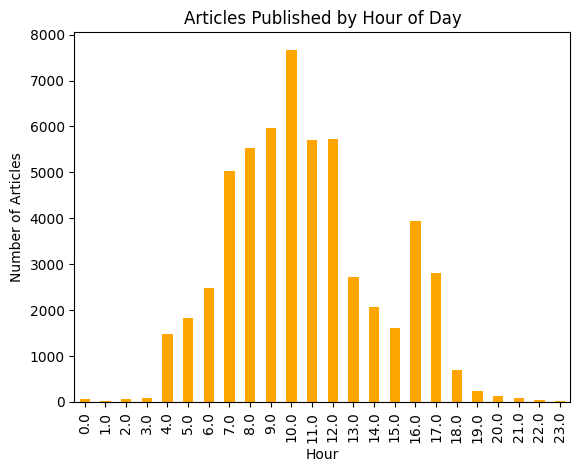

In [38]:
time_series_analysis.analyze_publishing_times(df)

so the above graph show us that the highest number of articles are published at 11:00 hour and the lowest amoount of articles are produces in 0.0, 1.0 , 2.0 , 3.0 19.0, 20.0, 22.0, 23,0 



### Analysis of Article Publishing Times by Hour

The bar graph displaying the distribution of articles published per hour reveals the following insights:

- **Peak Publication Time:**
  - The highest number of articles are published at **11:00 AM**, which stands out as the peak hour for article publishing.
  
- **Low Publication Times:**
  - The lowest number of articles are published at the following hours:
    - **0:00 (midnight)**
    - **1:00 AM**
    - **2:00 AM**
    - **3:00 AM**
    - **7:00 PM (19:00)**
    - **8:00 PM (20:00)**
    - **10:00 PM (22:00)**
    - **11:00 PM (23:00)**
  
- **Midday Peak:**
  - The **11:00 AM** peak could be attributed to the fact that many publishing teams may release news articles or updates during late morning, after collecting and verifying information during the first few hours of the working day.
  
- **Low Activity During Early Hours:**
  - The very low publishing rates during the early hours of the morning (**0:00 AM to 3:00 AM**) and at night (**7:00 PM to 11:00 PM**) could be a result of lower newsroom activity or a preference for releasing articles during business hours when more readers are active.
  - It's common for news outlets to slow down article publication during off-peak hours, as there is less audience engagement. This pattern may reflect the time needed for editorial reviews or other operational factors.
  
- **Potential Audience Influence:**
  - The publishing trends might also correlate with when audiences are more likely to engage with the content. Since readers are generally more active during daytime hours, especially around mid-morning, publishers likely aim to maximize their reach by posting articles when the audience is most likely to be online.
  
- **Lack of Activity in the Late Evening:**
  - The lack of activity during late evening hours (**7:00 PM to 11:00 PM**) might also suggest that publishers prefer to end the day’s editorial cycle before these hours. Alternatively, it could also be due to time zone differences if the articles are from international sources.

### Conclusion:
The article publication pattern suggests a preference for mid-morning releases, likely to capture audience attention when they are more engaged. The low number of articles published at night and early morning is typical of news outlets that focus on publishing during working hours to optimize visibility and reader engagement. 

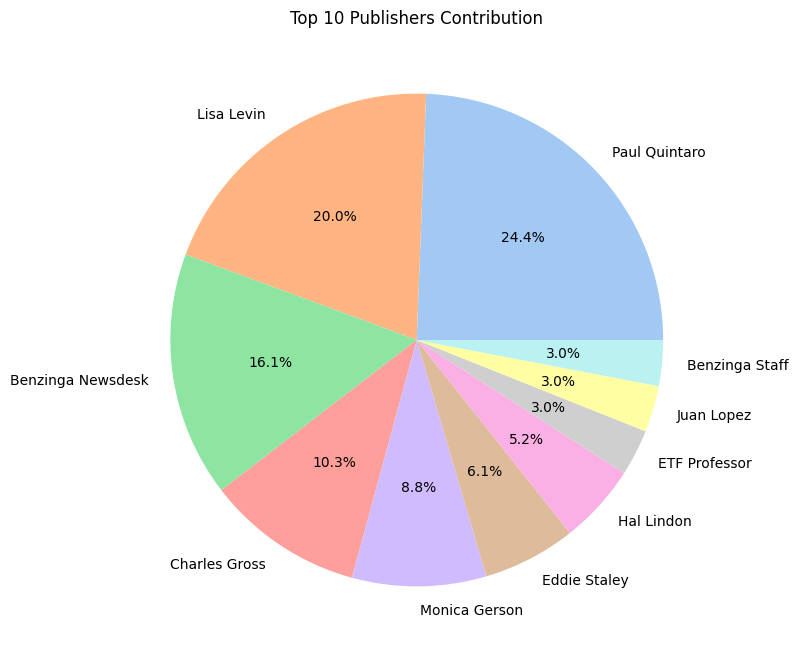

In [39]:
# Visualize contributions of top publishers
publisher_analysis.analyze_top_publishers(df)




### Analysis of Article Contribution by Top Publishers

From the top ten publishers, more than **50% of the articles** are contributed by just three publishers. The distribution is as follows:

- **Paul Quintaro**: **24.4%** of the total articles published.
- **Benzinga Newsdesk**: **16.1%** of the total articles published.
- **Lisa Levin**: **20.0%** of the total articles published.

Together, these three publishers account for a significant portion of the content, making up over **60%** of the total articles published.

The remaining **39.5%** of the articles are published by the other seven publishers. This indicates that the publishing landscape is **dominated by a few key players**, with a small group of publishers responsible for the majority of the output.

### Key Insights:

- **Concentration of Content**:
  - The fact that a **small number of publishers** (only three out of the top ten) account for more than half of the articles published suggests a concentration of content production. This could indicate that these publishers are larger, more established, or more active in generating news and articles.
  
- **Dominance of Major Publishers**:
  - The dominance of **Paul Quintaro**, **Benzinga Newsdesk**, and **Lisa Levin** highlights their significant influence in the publication space. This trend might be due to their larger editorial teams, higher resources, or a more extensive reach in terms of audience engagement.
  
- **The Long Tail of Publishers**:
  - The remaining **seven publishers** contribute a smaller share of the articles, which may reflect a **long-tail distribution** in publishing. This means that while a few major players dominate the space, there are still numerous smaller publishers with a more niche or targeted audience.

### Conclusion:
The publishing distribution shows a clear **disparity** in article contribution, with a few publishers responsible for the majority of content. This suggests that a small number of publishers wield significant influence over the publishing landscape, while many other smaller publishers collectively contribute a smaller fraction of the total content.



### Analyze Email Domains


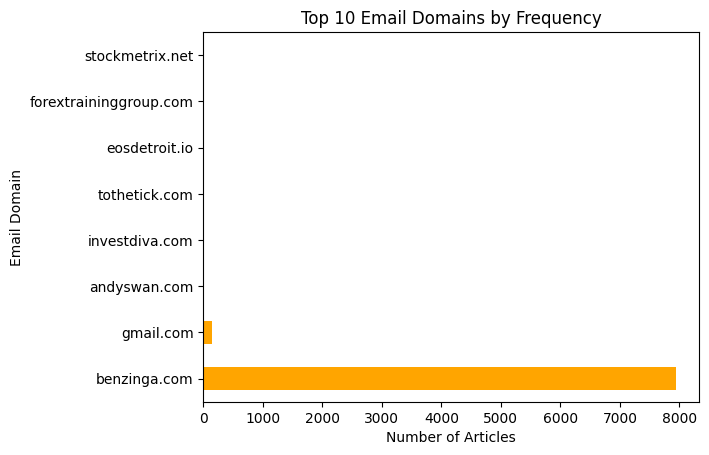

In [40]:
# Analyze email domains of publishers
publisher_analysis.analyze_email_domains(df)


Insights from Email Domain Analysis
The analysis of email domains associated with publishers provides the following insights:

Key Observations:
Dominance of benzinga.com:

A significant majority of the articles are associated with the email domain benzinga.com.
This indicates that Benzinga is the primary contributor to the published articles in the dataset, showcasing its influence and control over the content.
Minor Presence of gmail.com:

A small portion of the articles is linked to the domain gmail.com.
This suggests contributions from independent authors or freelancers who use personal email accounts.
Negligible Representation of Other Domains:

Other email domains make up a minimal fraction of the dataset, showing limited diversity in publishers' affiliations.

By understanding the concentration of email domains, we can conclude that the dataset primarily reflects the output of Benzinga, with limited contributions from external or independent sources. This insight could guide decisions about the dataset’s scope and representativeness.